# Import Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Load in the dataframe
df = pd.read_csv("https://raw.githubusercontent.com/ridhwanashir/VD-WordCloud/main/vgsales.csv", index_col=0)

# Data Exploration

In [4]:
# Looking at first 5 rows of the dataset
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Basic Information

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of genre games in this dataset such as {}... \n".format(len(df.Genre.unique()), 
                                                                           ", ".join(df.Genre.unique()[0:5])))

print("There are {} Publisher producing games in this dataset such as {}... \n".format(len(df.Publisher.unique()), 
                                                                                      ", ".join(df.Publisher.unique()[0:5])))

There are 16598 observations and 10 features in this dataset. 

There are 12 types of genre games in this dataset such as Sports, Platform, Racing, Role-Playing, Puzzle... 

There are 579 Publisher producing games in this dataset such as Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, Activision... 



Group by Genre

In [7]:
# Groupby by Genre
genre = df.groupby("Genre")

# Summary statistic of all countries
genre.describe().head()

Year                                 ... Global_Sales                   
            count         mean       std     min  ...          25%   50%   75%    max
Genre                                             ...                                
Action     3253.0  2007.909929  6.073115  1980.0  ...         0.07  0.19  0.50  21.40
Adventure  1276.0  2008.130878  4.910744  1983.0  ...         0.02  0.06  0.16  11.18
Fighting    836.0  2004.630383  6.158271  1980.0  ...         0.08  0.21  0.55  13.04
Misc       1710.0  2007.258480  4.661619  1980.0  ...         0.06  0.16  0.41  29.02
Platform    876.0  2003.820776  6.388817  1981.0  ...         0.09  0.28  0.79  40.24

[5 rows x 48 columns]

Select top 5 genre by global sales

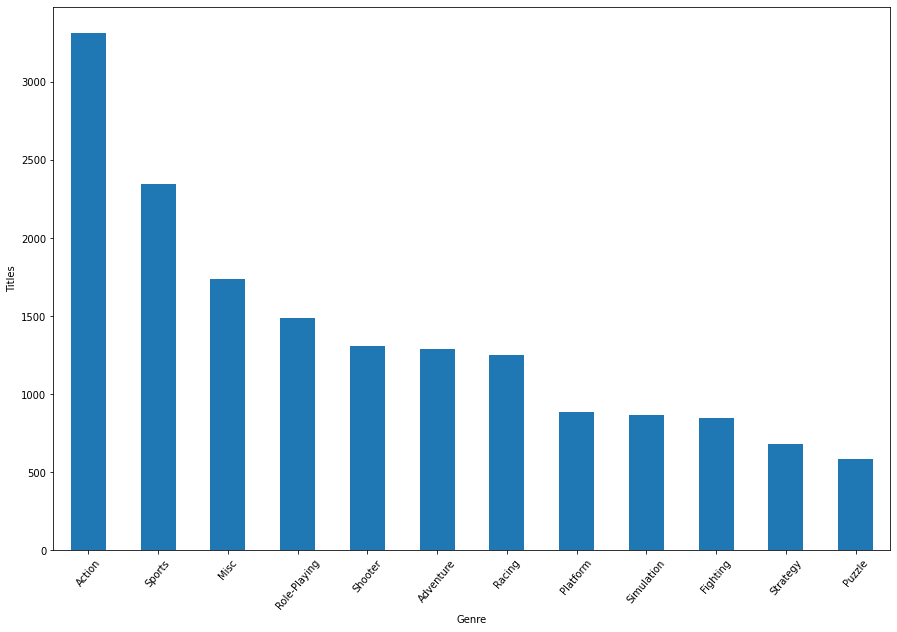

In [10]:
plt.figure(figsize=(15,10))
genre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.ylabel("Titles")
plt.show()

# Word Cloud

Testing Wordcloud

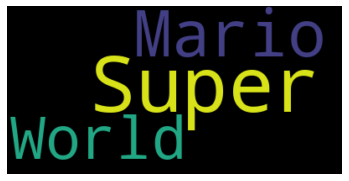

In [19]:
# Start with one review:
text = df.Name[19]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

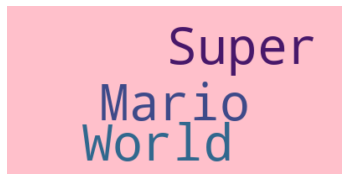

In [23]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="pink").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
wordcloud.to_file("first_review.png")

In [26]:
text = " ".join(review for review in df.Name)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 414395 words in the combination of all review.


Create Stopword List

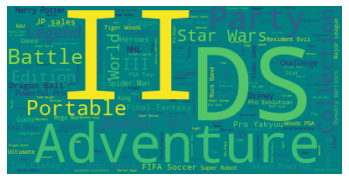

In [31]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["buy", "now", "games", "fun", "amazing"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="teal").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using Mask

In [34]:
from google.colab import files
uploaded = files.upload()

Saving wine.png to wine.png


In [35]:
wine_mask = np.array(Image.open("wine.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [37]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [39]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

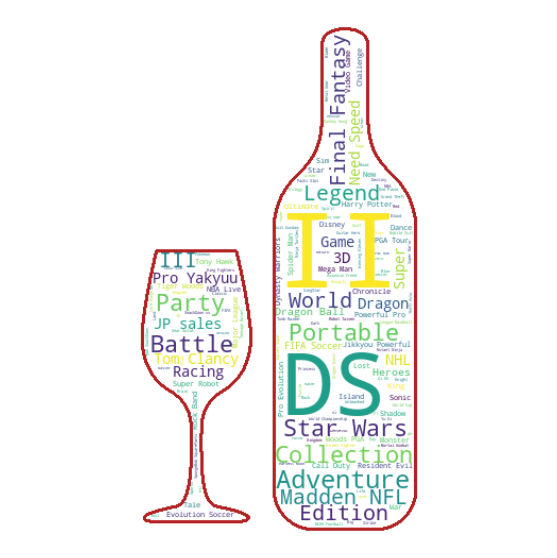

In [38]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud with color pattern

In [40]:
genre.size().sort_values(ascending=False).head()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
dtype: int64

In [42]:
# Join all reviews of each country:
action = " ".join(review for review in df[df["Genre"]=="Action"].Name)
sports = " ".join(review for review in df[df["Genre"]=="Sports"].Name)
misc = " ".join(review for review in df[df["Genre"]=="Misc"].Name)
rp = " ".join(review for review in df[df["Genre"]=="Role-Playing"].Name)
shooter = " ".join(review for review in df[df["Genre"]=="Shooter"].Name)

In [46]:
from google.colab import files
uploaded = files.upload()

Saving france.jpg to france.jpg
Saving italy.jpg to italy.jpg
Saving portugal.jpg to portugal.jpg
Saving spain.jpg to spain.jpg


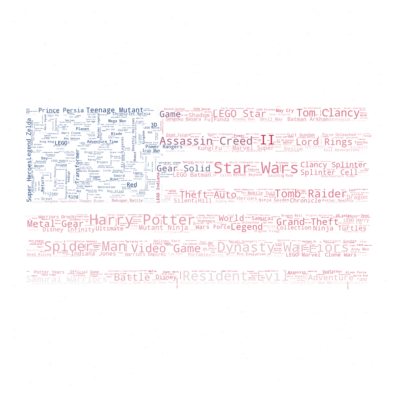

In [45]:
# Generate a word cloud image
mask = np.array(Image.open("US.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(action)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("us_wine.png", format="png")

plt.show()

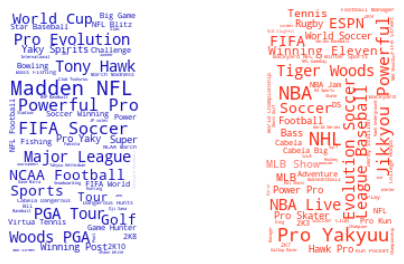

In [47]:
# Generate a word cloud image
mask = np.array(Image.open("france.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(sports)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("fra_wine.png", format="png")

#plt.show()

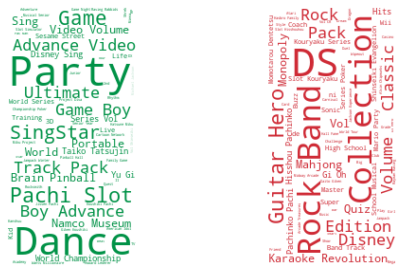

In [48]:
# Generate a word cloud image
mask = np.array(Image.open("italy.jpg"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(misc)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("ita_wine.png", format="png")

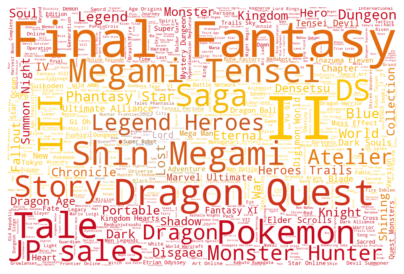

In [49]:
# Generate a word cloud image
mask = np.array(Image.open("spain.jpg"))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(rp)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("spa_wine.png", format="png")
#plt.show()

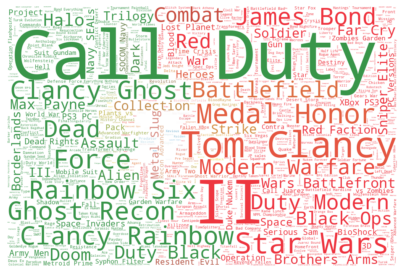

In [50]:
# Generate a word cloud image
mask = np.array(Image.open("portugal.jpg"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(shooter)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("por_wine.png", format="png")
#plt.show()